In [24]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Train SVM with Linear Kernel
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [28]:
# Train SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)

SVC(C=1)

In [35]:
# Evaluate Both Models
print("Linear Kernel SVM:")
print(confusion_matrix(y_test, linear_svm.predict(X_test_scaled)))
print(classification_report(y_test, linear_svm.predict(X_test_scaled)))


print("\nRBF Kernel SVM:")
print(confusion_matrix(y_test, rbf_svm.predict(X_test_scaled)))
print(classification_report(y_test, rbf_svm.predict(X_test_scaled)))


Linear Kernel SVM:
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


RBF Kernel SVM:
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [30]:
# Step 7: Cross Validation Score
linear_score = cross_val_score(linear_svm, X_train_scaled, y_train, cv=5)
rbf_score = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=5)
print(f"\nCV Accuracy (Linear): {linear_score.mean():.4f}")
print(f"CV Accuracy (RBF): {rbf_score.mean():.4f}")


CV Accuracy (Linear): 0.9692
CV Accuracy (RBF): 0.9758


In [31]:
# Step 8: Hyperparameter Tuning (RBF Kernel)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)
print("\nBest Params (RBF):", grid.best_params_)
print("Best Estimator Accuracy:", grid.best_estimator_.score(X_test_scaled, y_test))


Best Params (RBF): {'C': 100, 'gamma': 0.001}
Best Estimator Accuracy: 0.9824561403508771


In [32]:
# Step 9: Visualize Decision Boundary (Using PCA for 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

svm_2d = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_2d.fit(X_pca, y_train)

SVC(C=100, gamma=0.001)

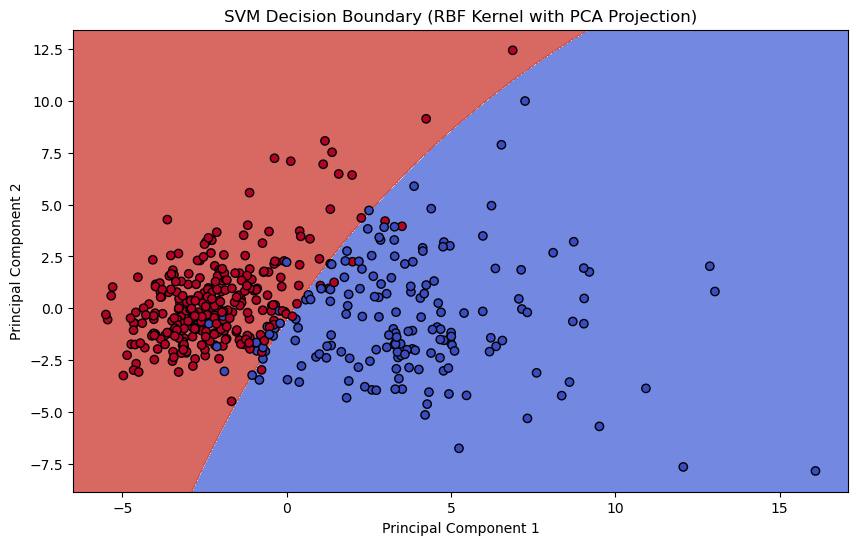

In [33]:
# Plot
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary (RBF Kernel with PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()